In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#read the file, of which profit and days(2017-12-31 minus transaction date) columns have been added, and data format has been modified
df = pd.read_excel("C:\\Users\\weizh\\OneDrive\\文档\\KPMG_VI_New_raw_data_update_final.xlsx", sheet_name='Transactions')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,days
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87,309
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55,224
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61,76
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36,122
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82,91


In [3]:
#there are 20,000 transaction records in total
df.shape

(20000, 15)

In [4]:
#double check the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
#check number of null values
df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
profit                       0
days                         0
dtype: int64

In [6]:
#standard_cost and product_first_sold_date are important for RFM rating calculation
#null value will be dropped (197 rows)
df.dropna(subset=['standard_cost', 'product_first_sold_date'], how='any', inplace=True)

In [7]:
df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
profit                       0
days                         0
dtype: int64

In [8]:
df.iloc[:, 5:10].apply(lambda x: x.value_counts()).T.stack()

order_status   Approved          19625.0
               Cancelled           178.0
brand          Giant Bicycles     3312.0
               Norco Bicycles     2910.0
               OHM Cycles         3043.0
               Solex              4253.0
               Trek Bicycles      2990.0
               WeareA2B           3295.0
product_line   Mountain            423.0
               Road               3970.0
               Standard          14176.0
               Touring            1234.0
product_class  high               3013.0
               low                2964.0
               medium            13826.0
product_size   large              3976.0
               medium            12990.0
               small              2837.0
dtype: float64

In [9]:
#drop the rows that have order_status as "Cancelled" (178 rows)
index_to_drop = df[df.order_status == 'Cancelled'].index
df.drop(index_to_drop, inplace=True)
df.order_status.value_counts()

Approved    19625
Name: order_status, dtype: int64

In [10]:
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,days
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87,309
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55,224
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61,76
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36,122
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21,802.26,190
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-10,104.24,52
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-20,1592.19,261
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-17,91.15,181


In [11]:
df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,profit,days
count,19625.000000,19625.000000,19625.000000,19273.000000,19625.000000,19625.000000,19625.000000,19625.000000
mean,9999.242038,45.796739,1739.572994,0.500285,1107.744983,555.821210,551.923772,182.447745
std,5777.316282,30.576832,1011.957495,0.500013,582.989189,405.977243,493.502909,105.406465
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,4.800000,1.000000
25%,4990.000000,18.000000,858.000000,0.000000,575.270000,215.140000,133.780000,90.000000
50%,10003.000000,45.000000,1737.000000,1.000000,1163.890000,507.580000,445.210000,181.000000
75%,15010.000000,72.000000,2615.000000,1.000000,1635.300000,795.100000,830.240000,274.000000
max,20000.000000,100.000000,5034.000000,1.000000,2091.470000,1759.850000,1702.550000,364.000000


In [12]:
#calculate rfm value
rfm = df.groupby('customer_id').agg({'days': lambda x: x.min(), 'transaction_id': lambda x: x.count(), 'profit': lambda x: x.sum()})
rfm.columns = ['recency', 'frequency', 'monetary']
rfm = pd.DataFrame(rfm)
rfm['monetary'] = rfm['monetary'].astype('int')

#store the customer id for later
customer_id = pd.DataFrame(rfm.index, columns=['customer_id'])
customer_id

,customer_id
0,1
1,2
2,3
3,4
4,5
...,...
3488,3497
3489,3498
3490,3499
3491,3500


In [13]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1 to 5034
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   recency    3493 non-null   int64
 1   frequency  3493 non-null   int64
 2   monetary   3493 non-null   int32
dtypes: int32(1), int64(2)
memory usage: 95.5 KB


In [14]:
rfm.describe()

,recency,frequency,monetary
count,3493.000000,3493.000000,3493.000000
mean,62.805039,5.618380,3100.430575
std,58.568975,2.296612,1764.116907
min,1.000000,1.000000,15.000000
25%,18.000000,4.000000,1828.000000
50%,45.000000,5.000000,2840.000000
75%,88.000000,7.000000,4150.000000
max,354.000000,14.000000,11668.000000


<AxesSubplot:>

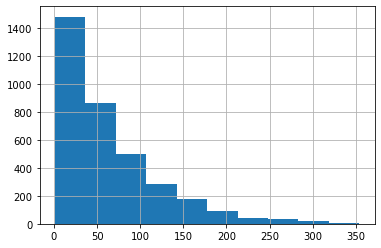

In [15]:
rfm.recency.hist()

<AxesSubplot:>

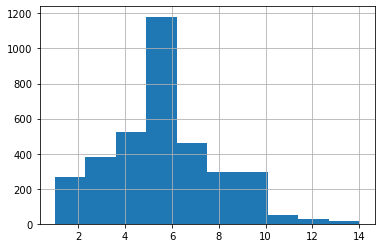

In [16]:
rfm.frequency.hist()

<AxesSubplot:>

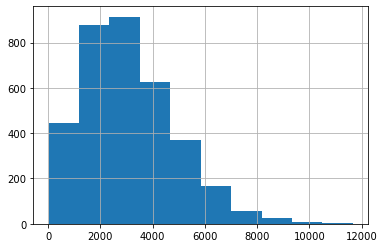

In [17]:
rfm.monetary.hist()

K-means will be used to find customer clusters

In [18]:
#before modelling, normalize the numerical data 
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
rfm = ms.fit_transform(rfm)
rfm

array([[0.01983003, 0.76923077, 0.25770188],
       [0.36260623, 0.15384615, 0.18973655],
       [0.28895184, 0.53846154, 0.28722217],
       ...,
       [0.14447592, 0.46153846, 0.42392517],
       [0.40793201, 0.38461538, 0.15189222],
       [0.23796034, 0.15384615, 0.02179696]])

In [19]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'wcss')

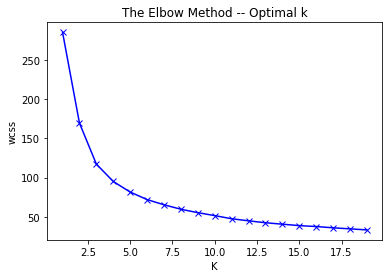

In [20]:
#Use Elbow Method to find the optimal number of clusters
wcss = [] 
K = range(1, 20)

for k in K:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42).fit(rfm)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bx-')
plt.title('The Elbow Method -- Optimal k')
plt.xlabel('K')
plt.ylabel('wcss')


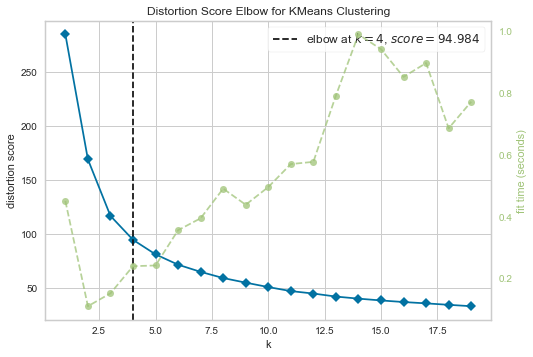

In [21]:
#From previous graph, the last elbow seems to be at 4. Now double check if the optimal k is 4:

from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(1, 20))
visu.fit(rfm)
visu.show();

In [22]:
rfm = pd.DataFrame(rfm, columns=['recency', 'frequency', 'monetary'])
rfm

,recency,frequency,monetary
0,0.019830,0.769231,0.257702
1,0.362606,0.153846,0.189737
2,0.288952,0.538462,0.287222
3,0.552408,0.076923,0.017592
4,0.045326,0.384615,0.204153
...,...,...,...
3488,0.147309,0.153846,0.140136
3489,0.359773,0.384615,0.268772
3490,0.144476,0.461538,0.423925
3491,0.407932,0.384615,0.151892


In [23]:
#fit the dataset to the model do divide it into 4 clusters

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42).fit(rfm)
rfm['cluster'] = kmeans.labels_

<AxesSubplot:>

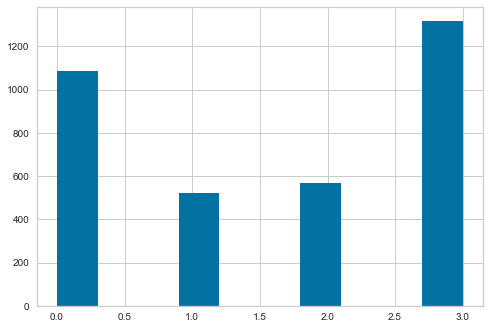

In [24]:
#distribution of the final clusters
rfm['cluster'].hist()

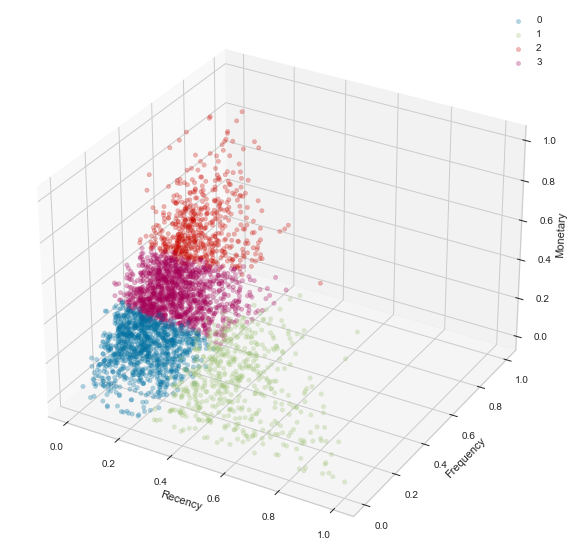

In [25]:
#plot the 4 clusters into 3D visual

fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster in set(rfm.cluster):
    rfmt = rfm[(rfm.cluster == cluster)]
    ax.scatter(rfmt.recency, rfmt.frequency, rfmt.monetary, alpha=0.3, label=cluster)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.legend()
plt.show()

In [26]:
#assign group names for each cluster 

condlist = [rfm['cluster'] == 2, rfm['cluster'] == 3, rfm['cluster'] == 0, rfm['cluster'] == 1]
values = ['platinum', 'gold', 'silver', 'bronze']

rfm['cluster_name'] = np.select(condlist, values).tolist()
rfm['customer_id'] = customer_id
rfm

,recency,frequency,monetary,cluster,cluster_name,customer_id
0,0.019830,0.769231,0.257702,2,platinum,1
1,0.362606,0.153846,0.189737,1,bronze,2
2,0.288952,0.538462,0.287222,3,gold,3
3,0.552408,0.076923,0.017592,1,bronze,4
4,0.045326,0.384615,0.204153,3,gold,5
...,...,...,...,...,...,...
3488,0.147309,0.153846,0.140136,0,silver,3497
3489,0.359773,0.384615,0.268772,3,gold,3498
3490,0.144476,0.461538,0.423925,3,gold,3499
3491,0.407932,0.384615,0.151892,1,bronze,3500


In [27]:
#export the final table into excel for further analysis
rfm.to_excel(r'C:\\Users\\weizh\\OneDrive\\文档\\customer_segmentation_result.xlsx')